In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split

In [9]:
import pandas as pd

df = pd.read_csv('./data/alzheimers_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [10]:
df.shape

(2149, 35)

In [11]:
# drop unimportaint colums
df.drop(columns=['PatientID', 'DoctorInCharge'], inplace=True)
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [12]:
df.isnull().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

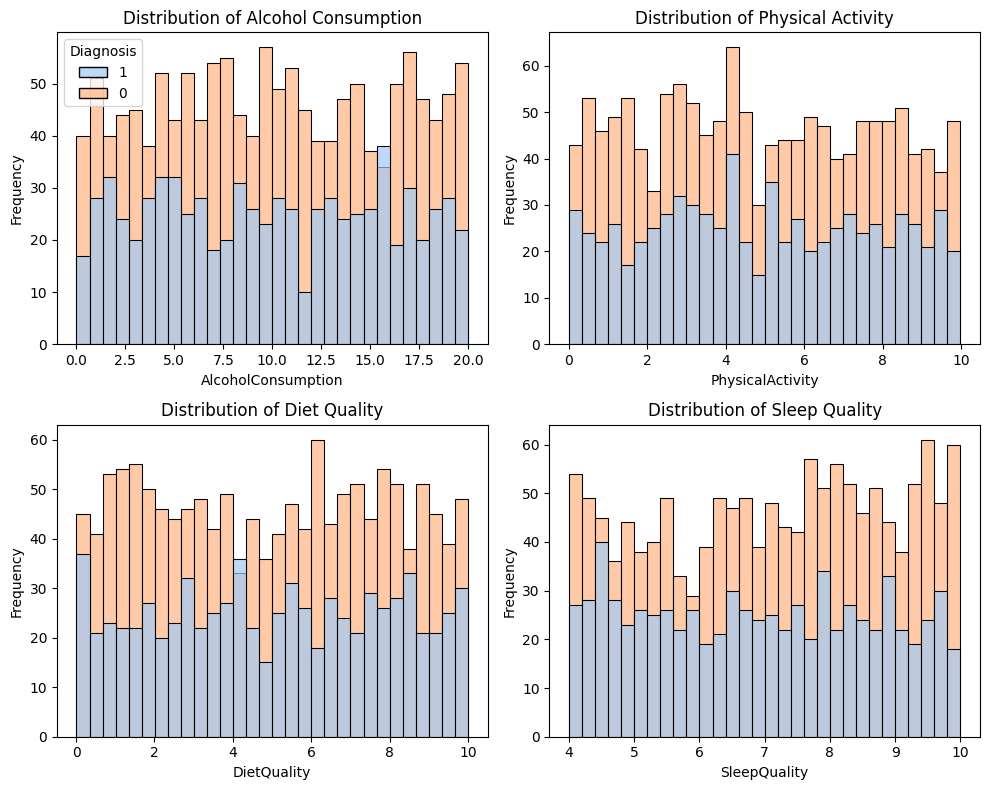

In [13]:
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

hue_order = [1, 0]  # Adjust the order here

# Plotting each histogram with additional features
sns.histplot(ax=axes[0, 0], x='AlcoholConsumption', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', alpha=.7).set(title='Distribution of Alcohol Consumption')
axes[0, 0].set_xlabel('AlcoholConsumption')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(ax=axes[0, 1], x='PhysicalActivity', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='Distribution of Physical Activity')
axes[0, 1].set_xlabel('PhysicalActivity')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(ax=axes[1, 0], x='DietQuality', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='Distribution of Diet Quality')
axes[1, 0].set_xlabel('DietQuality')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(ax=axes[1, 1], x='SleepQuality', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='Distribution of Sleep Quality')
axes[1, 1].set_xlabel('SleepQuality')
axes[1, 1].set_ylabel('Frequency')


# Adjust layout and show the plot
plt.tight_layout()
plt.show()

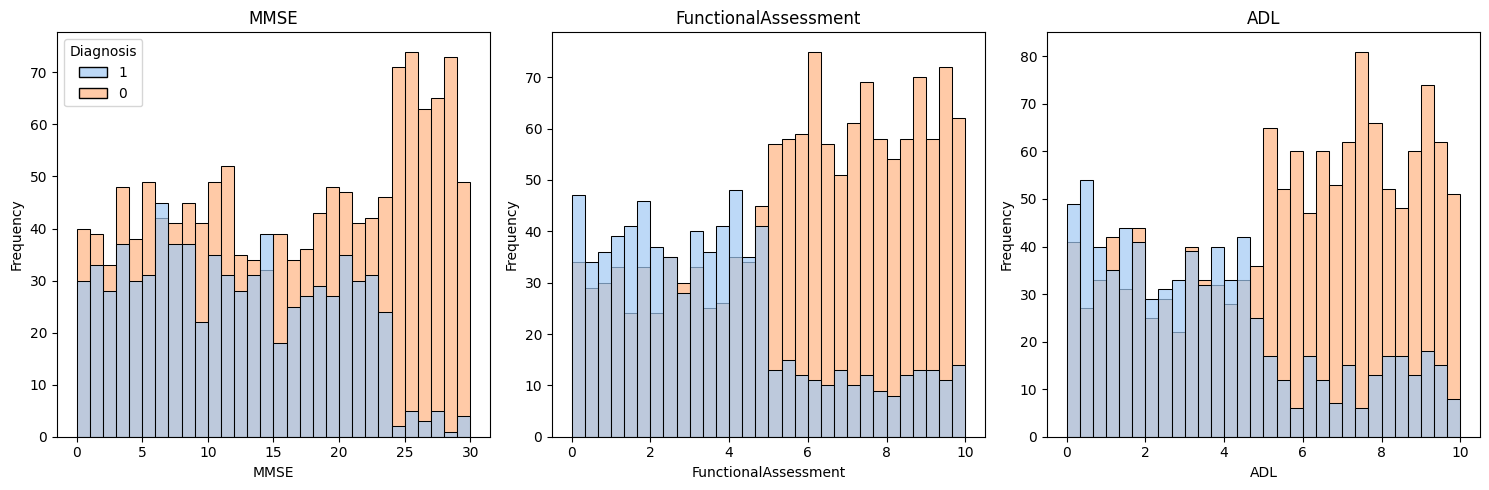

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting each histogram with additional features
sns.histplot(ax=axes[0], x='MMSE', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', alpha=.7).set(title='MMSE')
axes[0].set_xlabel('MMSE')
axes[0].set_ylabel('Frequency')

sns.histplot(ax=axes[1], x='FunctionalAssessment', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='FunctionalAssessment')
axes[1].set_xlabel('FunctionalAssessment')
axes[1].set_ylabel('Frequency')

sns.histplot(ax=axes[2], x='ADL', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='ADL')
axes[2].set_xlabel('ADL')
axes[2].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

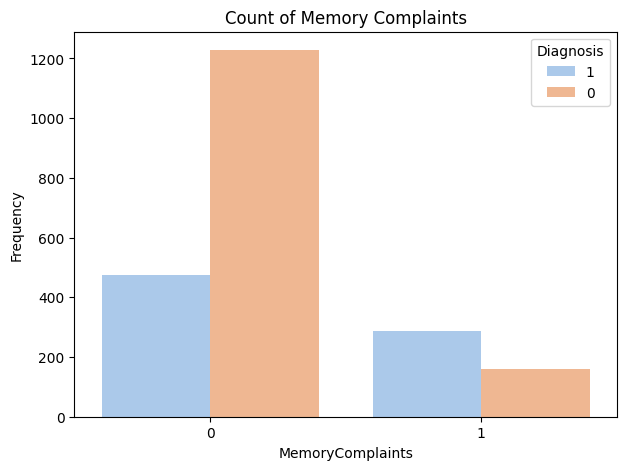

In [15]:

fig, axes = plt.subplots(figsize=(7, 5))

sns.countplot(x='MemoryComplaints', data=df, hue='Diagnosis', palette='pastel', hue_order=hue_order).set(title='Count of Memory Complaints')
plt.xlabel('MemoryComplaints')
plt.ylabel('Frequency')
plt.show()

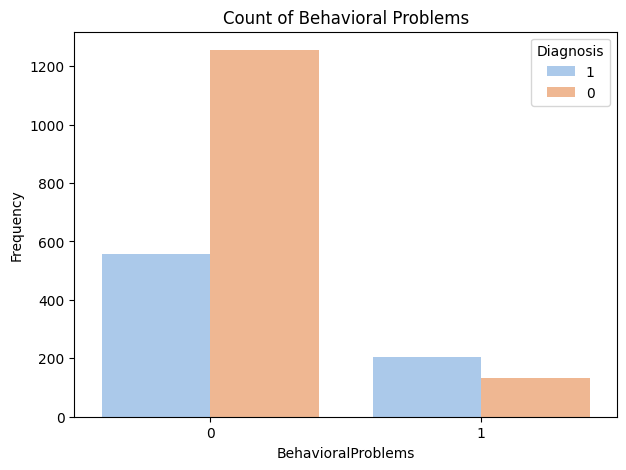

In [16]:

fig, axes = plt.subplots(figsize=(7, 5))

sns.countplot(x='BehavioralProblems', data=df, hue='Diagnosis', palette='pastel', hue_order=hue_order).set(title='Count of Behavioral Problems')
plt.xlabel('BehavioralProblems')
plt.ylabel('Frequency')
plt.show()

